In [60]:
import os 
import pandas as pd
import numpy as np 
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [61]:
bc_path = '../runs/BC_BC_pseudo_200000nfe_5seed'
ir_path = '../runs/IR_new_pseudo_mln_1000000nfe_5seed'
hyd_path = '../runs/HYD_pseudo_200000nfe_5seed'
full_path = '../runs/FULL_pseudo_mln_1000000nfe_5seed'
cwd = os.getcwd()

In [62]:
# Load the merged results
column_names = ['Hydropower', 'Environment', 'Irrigation']

df_bc = pd.read_csv(os.path.join(bc_path, "merged_results.csv"), usecols = column_names)
df_bc.to_csv(os.path.join(bc_path,'df_bc.csv'))

df_ir = pd.read_csv(os.path.join(ir_path, "merged_results.csv"), usecols = column_names)
df_ir.to_csv(os.path.join(ir_path,'df_ir.csv'))

df_hyd = pd.read_csv(os.path.join(hyd_path, "merged_results.csv"), usecols = column_names)
df_hyd.to_csv(os.path.join(hyd_path,'df_hyd.csv'))

df_full = pd.read_csv(os.path.join(full_path, "merged_results.csv"), usecols = column_names)
df_full.to_csv(os.path.join(full_path,'df_full.csv'))

In [63]:
# Perform Kruskal-Wallis H test for each deficit type
kruskal_results = {}
for column in ['Hydropower', 'Environment', 'Irrigation']:
    stat, p = kruskal(df_bc[column], df_full[column], df_hyd[column], df_ir[column])
    kruskal_results[column] = (stat, p)
    
print(kruskal_results)

{'Hydropower': (77.49240055331916, 1.0587863547296161e-16), 'Environment': (38.34032897121892, 2.3943381881627004e-08), 'Irrigation': (46.82971823516277, 3.7778989015805516e-10)}


In [74]:
# Combine datasets into a single DataFrame
combined_data = pd.concat([
    df_bc.assign(group='Base Case \n (3 Objectives)'),
    df_hyd.assign(group='Hydropower Case \n (8 Objectives)'),
    df_ir.assign(group='Irrigation Case \n (11 Objectives)'),   
    df_full.assign(group='Full Case \n (16 Objectives)')
])

# Perform Dunn’s test for each deficit type
for column in ['Hydropower', 'Environment', 'Irrigation']:
    posthoc = sp.posthoc_dunn(combined_data, val_col=column, group_col='group', p_adjust='bonferroni')
    print(f"Post-hoc Dunn's test results for {column}:\n", posthoc)
    


Post-hoc Dunn's test results for Hydropower:
                                     Base Case \n (3 Objectives)  \
Base Case \n (3 Objectives)                        1.000000e+00   
Full Case \n (16 Objectives)                       2.314481e-16   
Hydropower Case \n (8 Objectives)                  1.111611e-08   
Irrigation Case \n (11 Objectives)                 4.513606e-09   

                                    Full Case \n (16 Objectives)  \
Base Case \n (3 Objectives)                         2.314481e-16   
Full Case \n (16 Objectives)                        1.000000e+00   
Hydropower Case \n (8 Objectives)                   1.126095e-01   
Irrigation Case \n (11 Objectives)                  4.728794e-02   

                                    Hydropower Case \n (8 Objectives)  \
Base Case \n (3 Objectives)                              1.111611e-08   
Full Case \n (16 Objectives)                             1.126095e-01   
Hydropower Case \n (8 Objectives)                        1

In [8]:
combined_data

,Hydropower,Environment,Irrigation,group
0,11.594989,3.194563e+06,1.198328,Base Case \n (3 Objectives)
1,11.195192,2.977529e+06,1.745484,Base Case \n (3 Objectives)
2,15.203274,1.032662e+06,0.284340,Base Case \n (3 Objectives)
3,13.148074,1.267974e+06,1.528635,Base Case \n (3 Objectives)
4,11.999141,2.473003e+06,1.088327,Base Case \n (3 Objectives)
...,...,...,...,...
91,18.392878,4.036521e+05,1.462457,Full Case \n (16 Objectives)
92,18.608404,8.000481e+04,3.146797,Full Case \n (16 Objectives)
93,17.948755,3.162776e+05,2.791660,Full Case \n (16 Objectives)
94,21.191246,4.755550e+04,4.336071,Full Case \n (16 Objectives)


In [9]:
combined_data.to_csv('combined_merged_results_w3obj.csv')

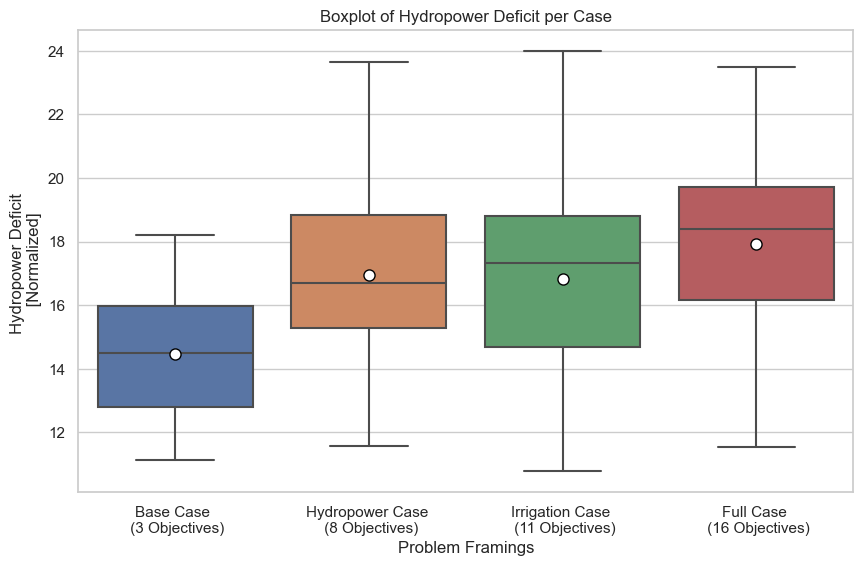

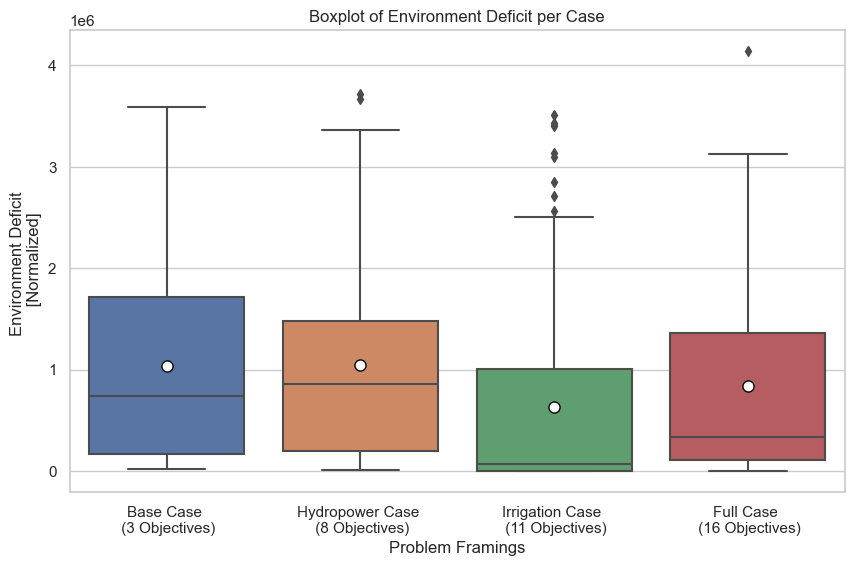

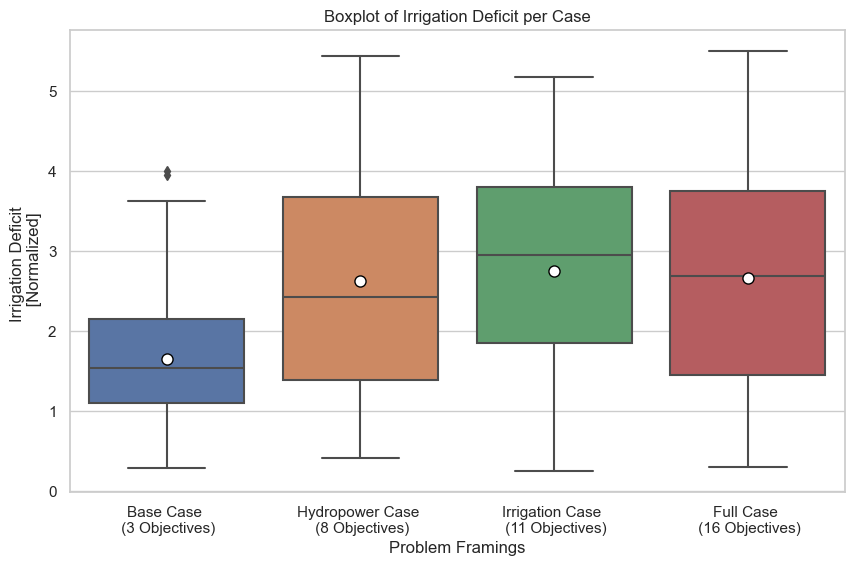

In [55]:
plots_dir = os.path.join('..', 'plots')
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

for column in ['Hydropower', 'Environment', 'Irrigation']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='group', y=column, data=combined_data, showmeans=True, meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
    #sns.set(style='whitegrid')
    plt.title(f'Boxplot of {column} Deficit per Case')
    plt.xlabel('Problem Framings')
    plt.ylabel(f'{column} Deficit \n [Normalized]')

    plt.show()
    plot_filename = os.path.join(plots_dir, f'{column}_Deficit_Boxplot.png')
    plt.savefig(plot_filename)
    plt.close()

Loading shapefile from ../data/HydroATLAS_Zambezi_v10_shp/HydroATLAS_Zambezi_v10_shp\BasinATLAS_Zambezi_v10_lev05.shp
Successfully loaded ../data/HydroATLAS_Zambezi_v10_shp/HydroATLAS_Zambezi_v10_shp\BasinATLAS_Zambezi_v10_lev05.shp
Loading shapefile from ../data/HydroATLAS_Zambezi_v10_shp/HydroATLAS_Zambezi_v10_shp\RiverATLAS_Zambezi_v10.shp
Successfully loaded ../data/HydroATLAS_Zambezi_v10_shp/HydroATLAS_Zambezi_v10_shp\RiverATLAS_Zambezi_v10.shp


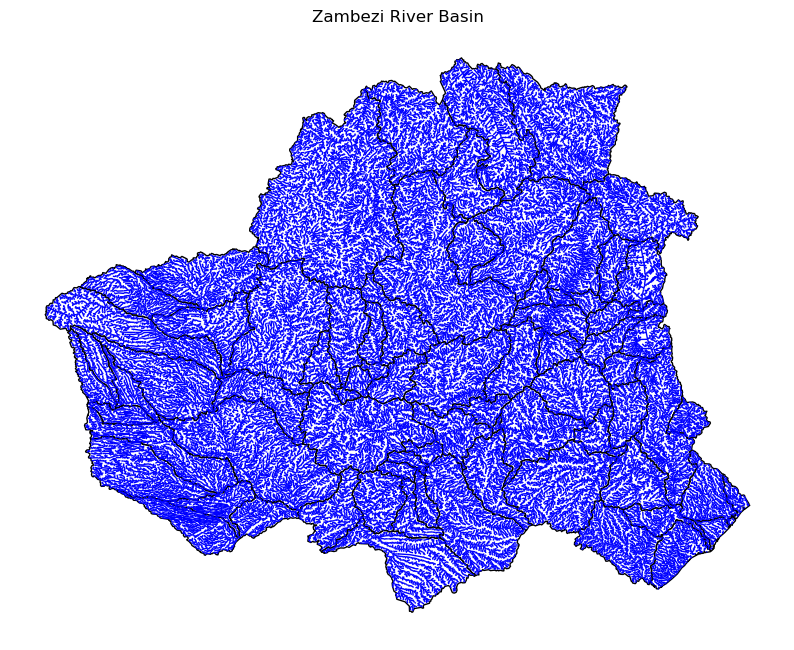

In [62]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the path to the shapefile
data_dir = '../data/HydroATLAS_Zambezi_v10_shp/HydroATLAS_Zambezi_v10_shp'
basinfile_name = 'BasinATLAS_Zambezi_v10_lev05.shp' 
basinfile_path = os.path.join(data_dir, basinfile_name)
riverfile_name = 'RiverATLAS_Zambezi_v10.shp'  # Ensure this matches your shapefile name
riverfile_path = os.path.join(data_dir, riverfile_name)

# Function to load and check the shapefile
def load_shapefile(filepath):
    print(f"Loading shapefile from {filepath}")
    try:
        gdf = gpd.read_file(filepath)
        print(f"Successfully loaded {filepath}")
        return gdf
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None

# Load the shapefiles
zambezi_basin = load_shapefile(basinfile_path)
zambezi_rivers = load_shapefile(riverfile_path)

# Check if the shapefiles were loaded successfully
if zambezi_basin is None or zambezi_rivers is None:
    print("Failed to load shapefiles. Please check the paths and file integrity.")
else:
    # Simplify geometries if they are too complex (optional)
    zambezi_basin = zambezi_basin.simplify(tolerance=0.01, preserve_topology=True)
    zambezi_rivers = zambezi_rivers.simplify(tolerance=0.01, preserve_topology=True)

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    zambezi_basin.boundary.plot(ax=ax, linewidth=1, color='black')
    zambezi_rivers.plot(ax=ax, linewidth=1, color='blue')

    # Customize the plot
    ax.set_title('Zambezi River Basin')
    ax.set_axis_off()

    plt.show()


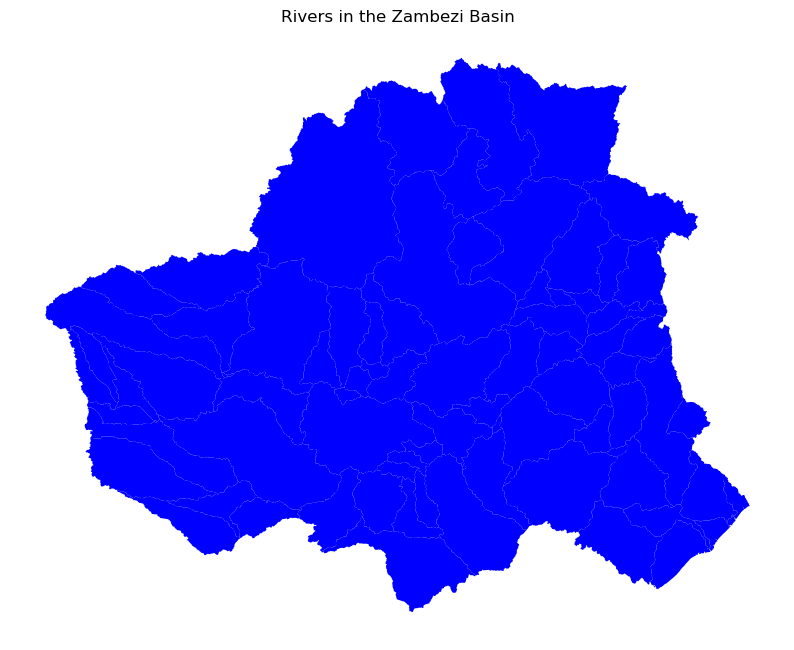

In [56]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
zambezi_rivers.plot(ax=ax, linewidth=1, color='blue')

# Customize the plot
ax.set_title('Rivers in the Zambezi Basin')
ax.set_axis_off()

# Show the plot
plt.show()